In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import h5py
import numpy as np
import torchvision
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

C:\Users\Dylan Melby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Dylan Melby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
#moonPic = Image.open('C:/User/Dylan Melby/Desktop/LunarLROLrocKaguya_118mperpix (1).png', 'r')
moonPic1 = Image.open("C:/Users/Dylan Melby/Desktop/png_test.png")
#plt.imshow(moonPic1)
#plt.show()

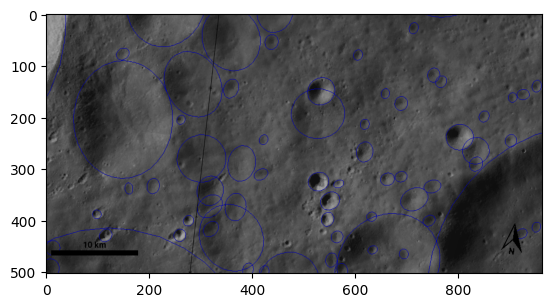

In [7]:
plt.imshow(moonPic1)
plt.show()

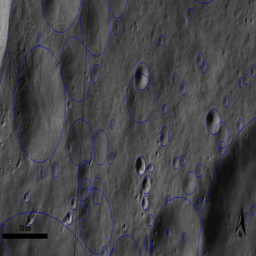

In [8]:
moonPic1.resize((256, 256))

In [10]:
import torchvision.transforms as T

trf = T.Compose([T.Resize(256), T.CenterCrop(224), T.ToTensor(), T.Normalize(mean=[0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])]) #PreProcessing for torchvision

In [11]:
inp = trf(moonPic1).unsqueeze(0)

In [12]:
out = fcn(inp)['out']
print(out.shape)

torch.Size([1, 21, 224, 224])


In [13]:
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print(om.shape)

(224, 224)


In [14]:
print (np.unique(om))

[ 0 15]


In [18]:

# Define the helper function
def decode_segmap(image, nc=21):
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
  rgb = np.stack([r, g, b], axis=2)
  return rgb

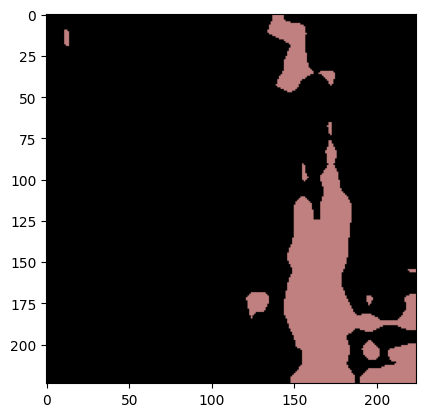

In [19]:
rgb = decode_segmap(om) 
plt.imshow(rgb); plt.show()

In [20]:
def segment(net, path):
  img = Image.open(path)
  plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(256), 
                   T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()

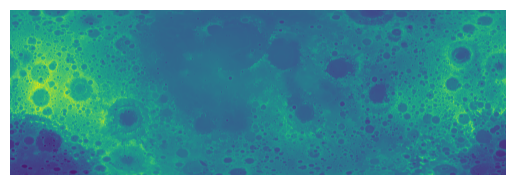

RuntimeError: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]

In [22]:
Image.MAX_IMAGE_PIXELS = 2831155201
segment(fcn, "C:/Users/Dylan Melby/Desktop/LunarLROLrocKaguya_118mperpix (1).png")

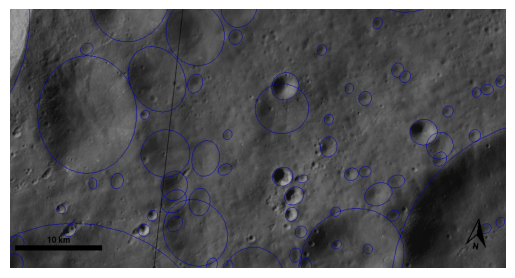

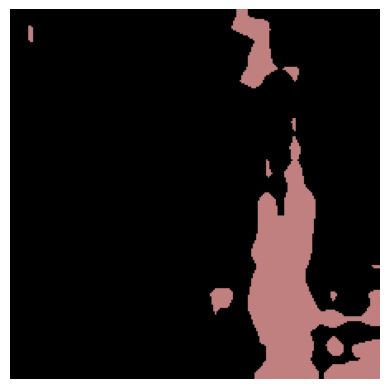

In [24]:
Image.MAX_IMAGE_PIXELS = 2831155201
segment(fcn, "C:/Users/Dylan Melby/Desktop/png_test.png")

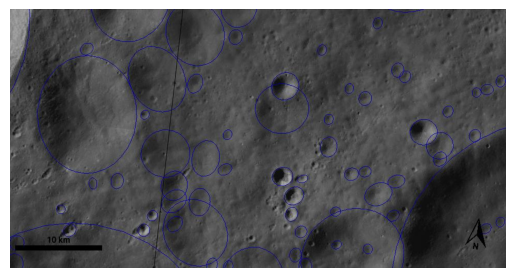

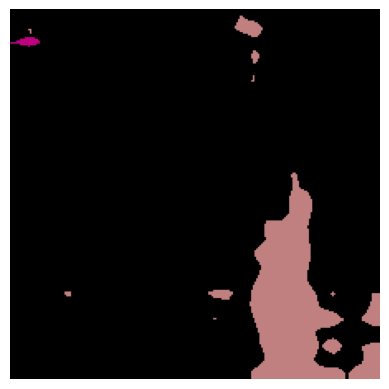

In [26]:
segment(fcn, "C:/Users/Dylan Melby/Desktop/jpeg_test.jpg")

In [27]:
	
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

C:\Users\Dylan Melby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Dylan Melby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to C:\Users\Dylan Melby/.cache\torch\hub\checkpoin

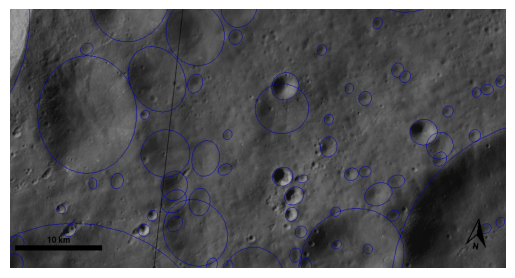

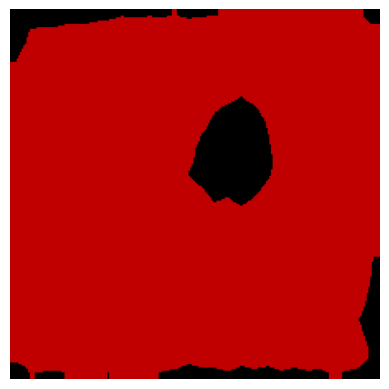

In [28]:
	
segment(dlab, "C:/Users/Dylan Melby/Desktop/png_test.png")

In [1]:
# Outputs rough circles on image

import cv2
import numpy as np

# Load image
img = cv2.imread("C:/Users/Dylan Melby/Desktop/TestData/TestData1.tif", 0)

# Apply Gaussian blur to reduce noise
img = cv2.GaussianBlur(img, (5, 5), 0)

# Detect circles using HoughCircles function
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=30, minRadius=0, maxRadius=0)

# Draw detected circles
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)
        cv2.imshow("Detected Circles", img)
        cv2.waitKey(0)
else:
    print("No circles detected.")

In [4]:
import cv2
import numpy as np

# Load image
img = cv2.imread("C:/Users/Dylan Melby/Desktop/TestData/TestData1.tif", 0)

# Apply Gaussian blur to reduce noise
img = cv2.GaussianBlur(img, (5, 5), 0)

# Apply adaptive thresholding to convert the image to binary
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply morphological closing to fill in any gaps in the binary image
kernel = np.ones((3,3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#print(contours)

# Find circular contours
circles = []
for cnt in contours:
    #area = cv2.contourArea(cnt)
    #perimeter = cv2.arcLength(cnt, True)
    #circularity = 4 * np.pi * area / perimeter ** 2
    #if circularity > 0.7:
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    circles.append((int(x), int(y), int(radius)))

# Draw detected circles
if len(circles) > 1:
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)
        cv2.imshow("Detected Craters", img)
        cv2.waitKey(0)
else:
    print("No circular craters detected.")

In [2]:
testImg = "C:/Users/Dylan Melby/Desktop/TestData/TestData1.tif"

In [3]:
import numpy as np
import cv2

def canny_edge_detector(input_pixels, h_min, h_max, aperture):
    # Blur it to remove noise
    # Apparently opencv canny automatically does 5x5 gaussian blur
    #blur = cv2.GaussianBlur(input_pixels, (3, 3), 0, 0, cv2.BORDER_REPLICATE)

    edges = cv2.Canny(input_pixels, h_min, h_max, apertureSize = aperture, L2gradient = False)
    mask = edges > 0
    canny = input_pixels * mask.reshape(input_pixels.shape).astype(input_pixels.dtype)
    output = []
    for (x, y), value in np.ndenumerate(canny):
        if value > 0:
            output.append((x, y))
        
    return np.array(output)

In [4]:
from math import sqrt, pi, cos, sin
from collections import defaultdict
import numpy as np
import csv

circle_points = {}

# uses midpoint circle algorithm
def _get_circle_points(radius):
    if not radius in circle_points:
        points = []
        if radius == 0:
            points.append((0, 0))
        else:
            x = radius
            y = 0
            error = -radius
            while x > y:
                if abs(x + y) != radius:
                    points.extend([(x, y), (-x, -y), (y, x), (-y, -x)])
                else:
                    points.extend([(x, y), (y, x)])

                if x != 0:
                    points.extend([(-x, y), (y, -x)])
                if y != 0:
                    points.extend([(x, -y), (-y, x)])

                error += y
                y += 1
                error += y
                if error >= 0:
                    error -= x
                    x -= 1
                    error -= x

            # last 4 points are not included in loop
            points.extend([(x, y), (-x, -y)])
            if x != 0:
                points.append((-x, y))
            if y != 0:
                points.append((x, -y))

        circle_points[radius] = points

    return circle_points[radius]

def find_circles(edge_data, rmin, rmax, threshold):

    acc = []
    for r in range(rmin, rmax + 1):
        acc.append(defaultdict(int))

    for x, y in edge_data:
        for r in range(rmin, rmax + 1):
            d = acc[r - rmin]
            for dx, dy in _get_circle_points(r):
                a = x - dx
                b = y - dy
                d[(a, b)] += 1

    circles = []
    for i in range(len(acc)):
        r = i + rmin
        num = len(_get_circle_points(r))
        for k, v in acc[i].items(): #sorted(acc.items(), key=lambda i: -i[1]):
            x, y = k
            if v / num >= threshold: #and all((x - xc) ** 2 + (y - yc) ** 2 > rc ** 2 for xc, yc, rc in circles):
                circles.append((x, y, r))

    return circles

# Returns true if two rectangles(l1, r1)  
# and (l2, r2) overlap 
def doOverlap(x1, y1, r1, x2, y2, r2): 
      
    # If one rectangle is on left side of other 
    if(x1 - r1 >= x2 + r2 or x2 - r2 >= x1 + r1): 
        return False
  
    # If one rectangle is above other 
    if(y1 - r1 >= y2 + r2 or y2 - r2 >= y1 + r1): 
        return False
  
    return True

def process_circles(circles):
    uniquecircles = []
    overlappingcircles = []
    for(x, y, r) in circles:
        unique=True
        for(x2,y2,r2) in uniquecircles:
            if doOverlap(x, y, r, x2, y2, r2):
                unique=False
                break

        if(unique):
            uniquecircles.append((x,y,r))
        else:
            overlappingcircles.append((x,y,r))
    return uniquecircles 

In [5]:
image = cv2.imread(testImg, cv2.IMREAD_GRAYSCALE)
edges = canny_edge_detector(image, 100, 200, 3)

In [6]:
circles = find_circles(edges, 6, 18, 0.45 )

In [7]:
unique = process_circles(circles)

In [8]:
output_image = cv2.cvtColor(image.copy(), cv2.COLOR_GRAY2RGB)
#for x, y, r in circles:
#    cv2.circle(output_image, (y, x), r, (0, 0, 255))

#cv2.imshow("output", output_image)
for (x, y, r) in unique:
    #cv2.circle(img, (x, y), r, (0, 255, 0), 2)
    cv2.circle(output_image, (y, x), r, (0, 0, 255))
    cv2.imshow("Detected Craters", output_image)
    cv2.waitKey(0)
#cv2.imshow("Detected Craters", output_image)